

**Install Required Libraries**



In [ ]:
!pip install pandas numpy matplotlib seaborn textblob


**Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Prodigy InfoTech/twittersentiment.csv/twitter_training.csv")
validation_data = pd.read_csv("/content/drive/MyDrive/Prodigy InfoTech/twittersentiment.csv/twitter_validation.csv")


**Displays the first five rows of the Twitter dataset, providing a quick overview of the data's structure and contents.**

In [ ]:
train_data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
col=['Id', 'Topic', 'Sentiment', 'Text']

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Prodigy InfoTech/twittersentiment.csv/twitter_training.csv",names=col)

In [ ]:
train_data.head(5)

,Id,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
train_data.tail(5)

,Id,Topic,Sentiment,Text
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
train_data.shape

(74682, 4)

In [ ]:
train_data.describe()

,Id
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [ ]:
train_data.columns

Index(['Id', 'Topic', 'Sentiment', 'Text'], dtype='object')

In [ ]:
train_data.dtypes

,0
Id,int64
Topic,object
Sentiment,object
Text,object


In [ ]:
unique_topics = train_data['Topic'].unique()
print(unique_topics)

['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty' 'TomClancysRainbowSix' 'Facebook'
 'GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson' 'Cyberpunk2077'
 'TomClancysGhostRecon' 'Nvidia']


In [ ]:
unique_Sentiment = train_data['Sentiment'].unique()
print(unique_Sentiment)

['Positive' 'Neutral' 'Negative' 'Irrelevant']


**Data Preprocessing:**

checking for missing values

In [ ]:
train_data.isnull().sum()

,0
Id,0
Topic,0
Sentiment,0
Text,686


In [ ]:
train_data.dropna(inplace=True)

In [ ]:
train_data.isnull().sum()

,0
Id,0
Topic,0
Sentiment,0
Text,0


Checking for duplicate values

In [ ]:
train_data.duplicated().sum()

2340

In [ ]:
train_data.drop_duplicates(inplace=True)

In [ ]:
train_data.duplicated().sum()

0

**Data Visualization**

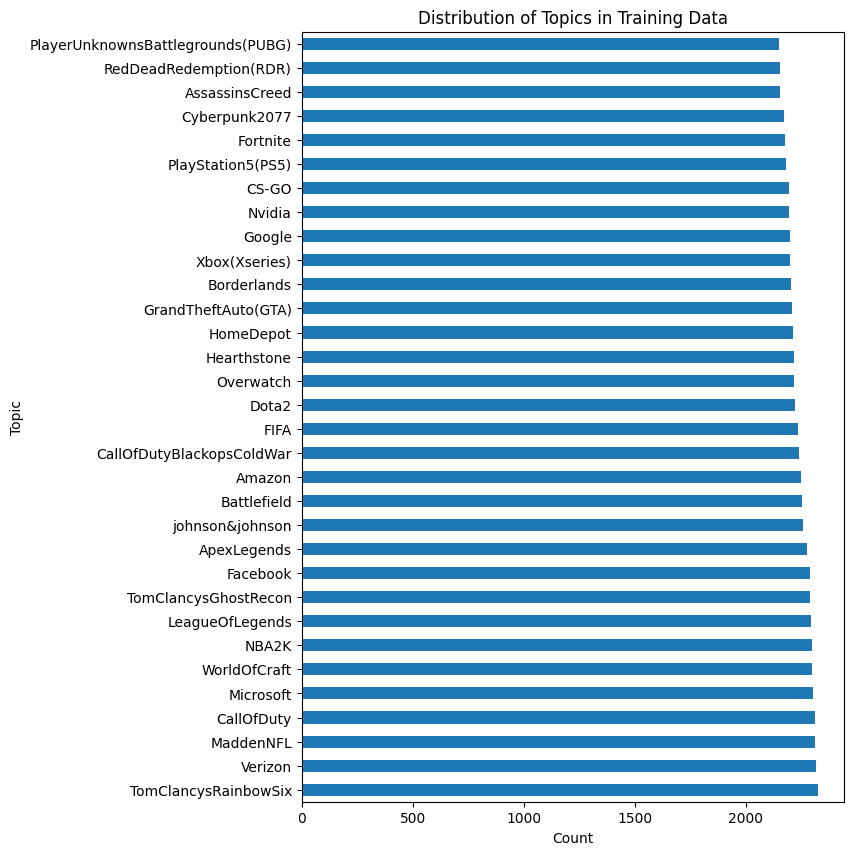

In [ ]:
plt.figure(figsize=(7,10))
train_data['Topic'].value_counts().plot(kind='barh')
plt.xlabel("Count")
plt.title("Distribution of Topics in Training Data")
plt.show()

<ipython-input-24-0b434db7906a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=train_data, palette='coolwarm')


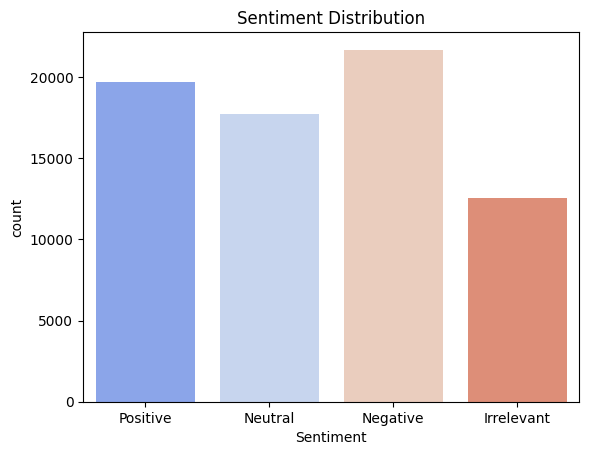

In [ ]:
sns.countplot(x='Sentiment', data=train_data, palette='coolwarm')
plt.title("Sentiment Distribution")
plt.show()

<ipython-input-25-2cd9196ec93a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], x='Topic', y='Count', palette='viridis')


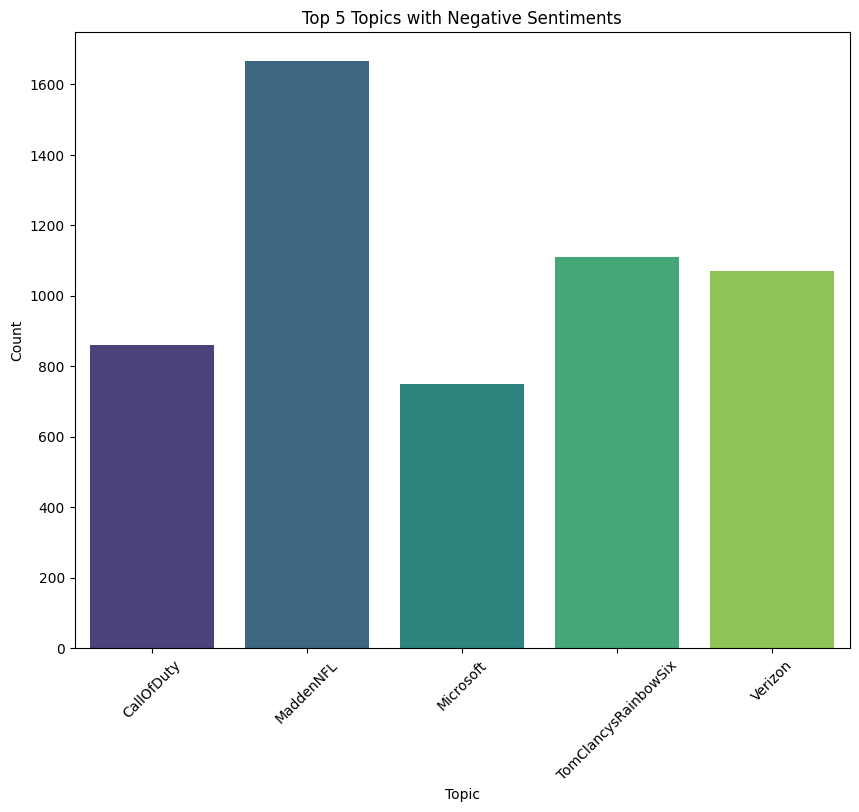

In [ ]:
import pandas as pd

# Example: Assuming you have 'train_data' DataFrame with 'Topic' and 'Sentiment' columns
top_topics = train_data['Topic'].value_counts().head(5).index.tolist()
top_topics_sentiment = train_data[train_data['Topic'].isin(top_topics)].groupby(['Topic', 'Sentiment']).size().reset_index(name='Count')

# Now you can use 'top_topics_sentiment' in your plotting code
plt.figure(figsize=(10, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], x='Topic', y='Count', palette='viridis')
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-26-306a84759d44>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'], x='Topic', y='Count', palette='Greens')


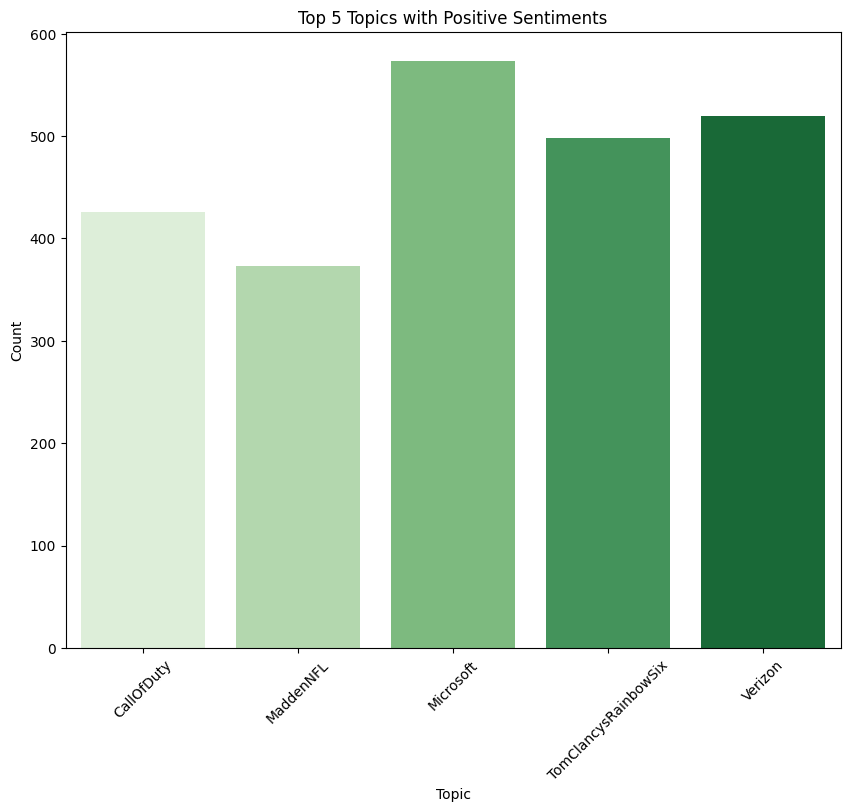

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'], x='Topic', y='Count', palette='Greens')
plt.title('Top 5 Topics with Positive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-27-a69220ceea08>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'], x='Topic', y='Count', palette='Blues')


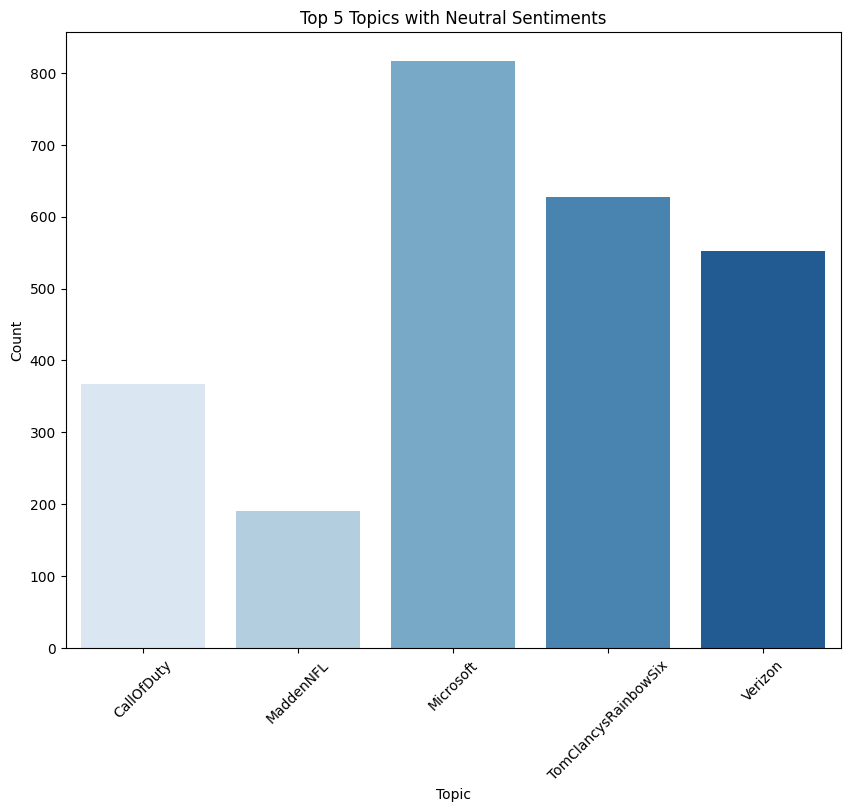

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'], x='Topic', y='Count', palette='Blues')
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-28-a106890823df>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'], x='Topic', y='Count', palette='Purples')


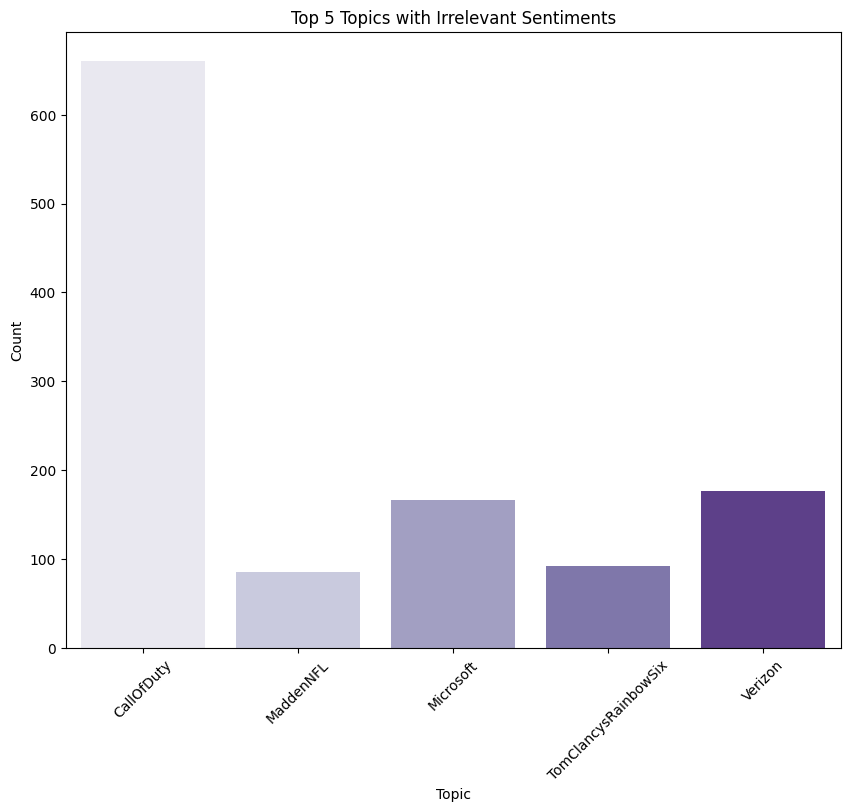

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'], x='Topic', y='Count', palette='Purples')
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


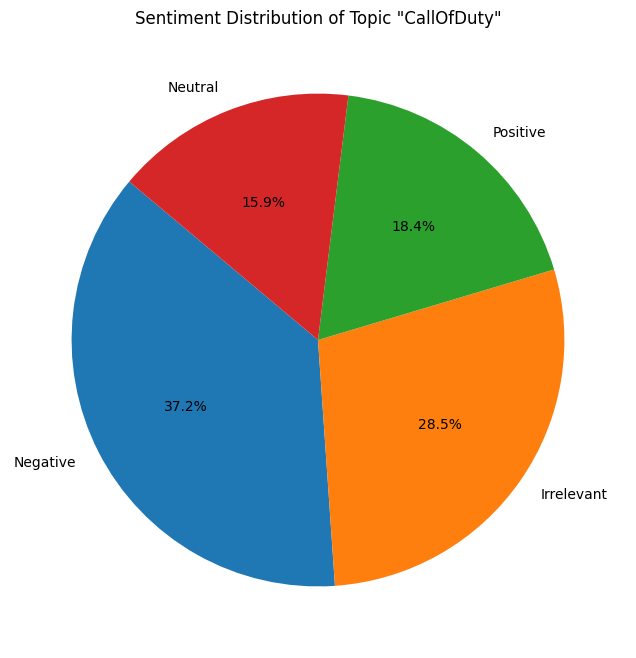

In [ ]:
# Filter the dataset to include only entries related to the topic 'Google'
col_data = train_data[train_data['Topic'] == 'CallOfDuty']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = col_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "CallOfDuty"')
plt.show()

This code provides a thorough EDA process for sentiment analysis, covering basic statistics, sentiment calculation, and various visualizations. Adjust column names and file paths as needed based on your specific dataset.